# Working with APIs

In [1]:
import requests

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Following along in a tutorial
Tutorial: https://www.youtube.com/watch?v=2HfSFdPEFRg<br>
Also, to make requests using jupyter labs, you must paste "jupyter lab --NotebookApp.iopub_data_rate_limit=1e10" into your Conda environment(what you open jupyter labs with) <br>
If you are using jupyter notebook, change the word "lab" into "notebook" <br>
If you get the error "TypeError: warn() missing 1 required keyword-only argument: 'stacklevel'", then paste "conda install traitlets==5.9.0 -c conda-forge" into Conda <br>
Note that the API key is copied from my personal key from the coinmarket website (I am using a free account)

In [3]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '61e49379-88e5-4dc1-8d67-87ac949268fe',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-19T23:13:58.007Z', 'error_code': 0, 'error_message': None, 'elapsed': 56, 'credit_count': 25, 'notice': None, 'total_count': 8745}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10759, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

# Normalize the data

In [4]:
import pandas as pd

In [5]:
pd.json_normalize(data['data'])
#pd.set_option('display.max_columns', None)

id         name  symbol            slug  num_market_pairs  \
0         1      Bitcoin     BTC         bitcoin             10759   
1      1027     Ethereum     ETH        ethereum              8283   
2       825  Tether USDt    USDT          tether             72183   
3      1839          BNB     BNB             bnb              2023   
4      5426       Solana     SOL          solana               616   
...     ...          ...     ...             ...               ...   
4995  23395   Archive AI   ARCAI      archive-ai                 2   
4996  28354  Verge (ETH)     XVG       verge-eth                 7   
4997  22938    MegaWorld    MEGA       megaworld                 4   
4998  28647       Catboy  CATBOY         cat-boy                 2   
4999  28992          Win     WIN  connect-united                 1   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2023-02-04T17:34:03.000Z   
4996  2023-11-03T11:48:25.000Z   
4997  2022-12-10T01:54:23.000Z   
4998  2023-12-08T07:39:30.000Z   
4999  2024-01-10T02:54:55.000Z   

                                                   tags   max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...   21000000.0   
1     [pos, smart-contracts, ethereum-ecosystem, coi...          NaN   
2     [payments, stablecoin, asset-backed-stablecoin...          NaN   
3     [marketplace, centralized-exchange, payments, ...          NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...          NaN   
...                                                 ...          ...   
4995                                                 []    6800000.0   
4996                                                 []          NaN   
4997                                                 []   20000000.0   
4998                        [collectibles-nfts, gaming]  100000000.0   
4999                                                 []          NaN   

      circulating_supply        total_supply  ...  quote.USD.market_cap  \
0           1.960286e+07            19602856  ...          8.158841e+11   
1           1.201771e+08    120177064.748691  ...          2.993881e+11   
2           9.506002e+10  98601637401.381531  ...          9.497925e+10   
3           1.495489e+08    149548918.728067  ...          4.682155e+10   
4           4.329122e+08    567562241.758048  ...          4.035875e+10   
...                  ...                 ...  ...                   ...   
4995        0.000000e+00             1000000  ...          0.000000e+00   
4996        0.000000e+00         13244000000  ...          0.000000e+00   
4997        0.000000e+00            20000000  ...          0.000000e+00   
4998        0.000000e+00           100000000  ...          0.000000e+00   
4999        0.000000e+00                   0  ...          0.000000e+00   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                            49.7848                        8.740342e+11   
1                            18.2685                        2.993881e+11   
2                             5.7944                        9.851785e+10   
3                             2.8565                        4.682155e+10   
4                             2.4627                        5.291166e+10   
...                              ...                                 ...   
4995                          0.0000                        1.050922e+05   
4996                          0.0000                        2.603796e+06   
4997                          0.0000                        1.826502e+06   
4998                          0.0000                        1.428484e+05   
4999                          0.0000                        0.000000e+00   

      quote.USD.tvl    quote.USD.last_updated  platform.id platform.name  \
0   

# Doing the same with Indeed API (Cannot, It has been depriciated)

# New Plan
Because all of the apis for the job posting sites I have searched for an api  have been depriciated (simplyhired, indeed, and glassdoor), I will instead use the above crypto api for my project. <br>
I will make a demo graph using the above data and use that for the website

In [6]:
df = pd.json_normalize(data['data'])
df

id         name  symbol            slug  num_market_pairs  \
0         1      Bitcoin     BTC         bitcoin             10759   
1      1027     Ethereum     ETH        ethereum              8283   
2       825  Tether USDt    USDT          tether             72183   
3      1839          BNB     BNB             bnb              2023   
4      5426       Solana     SOL          solana               616   
...     ...          ...     ...             ...               ...   
4995  23395   Archive AI   ARCAI      archive-ai                 2   
4996  28354  Verge (ETH)     XVG       verge-eth                 7   
4997  22938    MegaWorld    MEGA       megaworld                 4   
4998  28647       Catboy  CATBOY         cat-boy                 2   
4999  28992          Win     WIN  connect-united                 1   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2023-02-04T17:34:03.000Z   
4996  2023-11-03T11:48:25.000Z   
4997  2022-12-10T01:54:23.000Z   
4998  2023-12-08T07:39:30.000Z   
4999  2024-01-10T02:54:55.000Z   

                                                   tags   max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...   21000000.0   
1     [pos, smart-contracts, ethereum-ecosystem, coi...          NaN   
2     [payments, stablecoin, asset-backed-stablecoin...          NaN   
3     [marketplace, centralized-exchange, payments, ...          NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...          NaN   
...                                                 ...          ...   
4995                                                 []    6800000.0   
4996                                                 []          NaN   
4997                                                 []   20000000.0   
4998                        [collectibles-nfts, gaming]  100000000.0   
4999                                                 []          NaN   

      circulating_supply        total_supply  ...  quote.USD.market_cap  \
0           1.960286e+07            19602856  ...          8.158841e+11   
1           1.201771e+08    120177064.748691  ...          2.993881e+11   
2           9.506002e+10  98601637401.381531  ...          9.497925e+10   
3           1.495489e+08    149548918.728067  ...          4.682155e+10   
4           4.329122e+08    567562241.758048  ...          4.035875e+10   
...                  ...                 ...  ...                   ...   
4995        0.000000e+00             1000000  ...          0.000000e+00   
4996        0.000000e+00         13244000000  ...          0.000000e+00   
4997        0.000000e+00            20000000  ...          0.000000e+00   
4998        0.000000e+00           100000000  ...          0.000000e+00   
4999        0.000000e+00                   0  ...          0.000000e+00   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                            49.7848                        8.740342e+11   
1                            18.2685                        2.993881e+11   
2                             5.7944                        9.851785e+10   
3                             2.8565                        4.682155e+10   
4                             2.4627                        5.291166e+10   
...                              ...                                 ...   
4995                          0.0000                        1.050922e+05   
4996                          0.0000                        2.603796e+06   
4997                          0.0000                        1.826502e+06   
4998                          0.0000                        1.428484e+05   
4999                          0.0000                        0.000000e+00   

      quote.USD.tvl    quote.USD.last_updated  platform.id platform.name  \
0   

In [7]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')

In [8]:
df['name']

0           Bitcoin
1          Ethereum
2       Tether USDt
3               BNB
4            Solana
           ...     
4995     Archive AI
4996    Verge (ETH)
4997      MegaWorld
4998         Catboy
4999            Win
Name: name, Length: 5000, dtype: object

In [17]:
df.shape

(5000, 36)

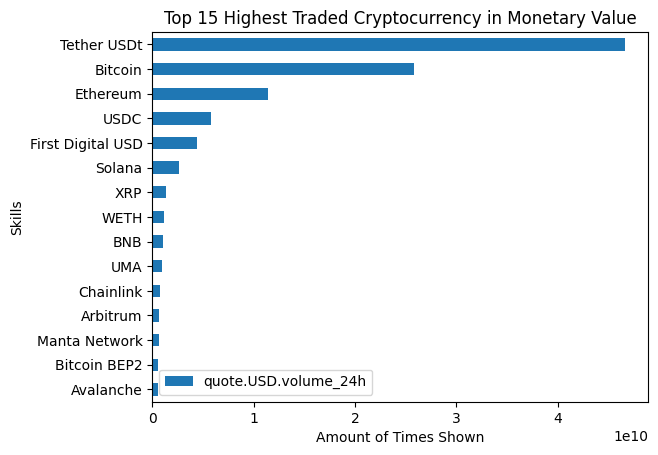

In [9]:
import matplotlib.pyplot as plt
ax = plt 
ax = df[['name','quote.USD.volume_24h']].nlargest(15, 'quote.USD.volume_24h').dropna().set_index('name').sort_values(ascending = True, by = 'quote.USD.volume_24h').plot.barh(title= 'Top 15 Highest Traded Cryptocurrency in Monetary Value')
ax.set(xlabel='Amount of Times Shown', ylabel='Skills')
plt.savefig('CryptoGraph.png')
plt.show()


In [10]:
#df['quote.USD.price'].round(2).nlargest(15).dropna().sort_values(ascending = True)

In [11]:
#df[['name','quote.USD.volume_24h']]

In [12]:
#df[['name','quote.USD.volume_24h']].nlargest(15, 'quote.USD.volume_24h').set_index('name')

## Exporting graph as image

In [13]:
# had to save the plt in the same cell else it gets wiped
#plt.savefig('CryptoGraph.png')

In [14]:
plt.show()

In [15]:
df.to_csv('coinMarketDF.csv')